<a href="https://colab.research.google.com/github/nhjoy/ANN-Function-Approx/blob/main/sinusoidal_Trigonometric_Function_Approximator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies and settings

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

In [2]:
# version check
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)


unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.19.5
TensorFlow 2.7.0
Keras 2.7.0


In [3]:
# trigonometric function settings

sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set
tf_model_name = 'sinosoidal'


# Random function generation with noise

In [4]:
# random sample generation

np.random.seed(1234)
total_size = sample_num
x_val = np.random.uniform(low = (-2*math.pi), high = (2*math.pi), size = total_size)
np.random.shuffle(x_val)

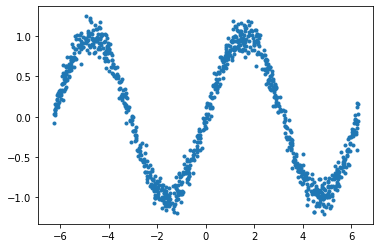

In [5]:
# noisy sinwave generator
y_val = np.sin(x_val) + (0.1 * np.random.randn(x_val.shape[0]))
plt.plot(x_val, y_val, '.');


# Training, Validation, and Test sets

In [6]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

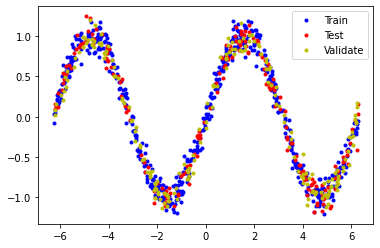

In [7]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()



# ANN Model

In [8]:
# model creation
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(1,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 50)                850       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


# Training

In [9]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Training model
history = model.fit(x_train, y_train, epochs=1000, batch_size=100, validation_data=(x_val, y_val))


Epoch 1/1000
6/6 [==============================] - 2s 66ms/step - loss: 0.7686 - mae: 0.7686 - val_loss: 0.7424 - val_mae: 0.7424
Epoch 2/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.6567 - mae: 0.6567 - val_loss: 0.6614 - val_mae: 0.6614
Epoch 3/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6123 - mae: 0.6123 - val_loss: 0.6126 - val_mae: 0.6126
Epoch 4/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.5796 - mae: 0.5796 - val_loss: 0.5826 - val_mae: 0.5826
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.5539 - mae: 0.5539 - val_loss: 0.5733 - val_mae: 0.5733
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5493 - mae: 0.5493 - val_loss: 0.5681 - val_mae: 0.5681
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.5454 - mae: 0.5454 - val_loss: 0.5607 - val_mae: 0.5607
Epoch 8/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.5387 - ma

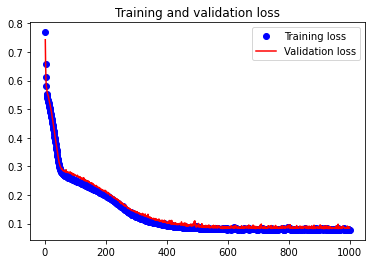

In [10]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

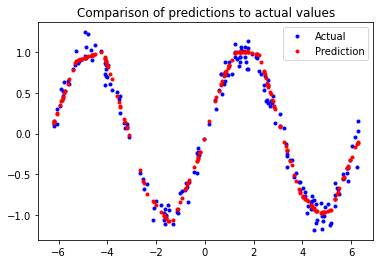

In [11]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [12]:
model.save('myModel.h5')

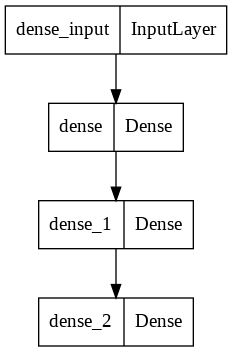

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')